<a href="https://colab.research.google.com/github/annisaairinadita/Quiz_Image_Processing/blob/main/Quiz_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

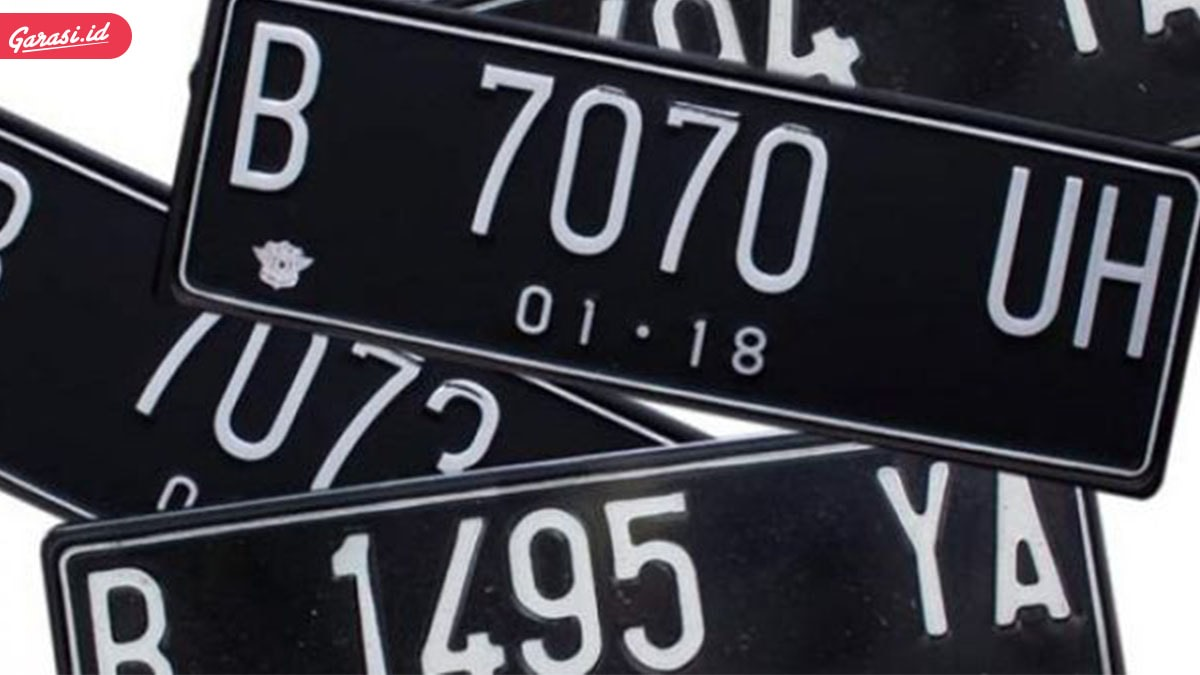

In [96]:
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

#1 Membaca gambar dengan OpenCV dan PIL

# Membaca gambar menggunakan OpenCV
image_cv2 = cv2.imread('plat nomor.jpg')

resized_image_cv2 = cv2.resize(image_cv2, (400, 300))
gray_image = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)

# Membaca gambar menggunakan PIL
image_pil = Image.open('plat nomor.jpg')

# Menampilkan gambar
cv2_imshow(image_cv2)
image_pil.show()



array([[[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [210, 208, 208],
        [212, 210, 210],
        [211, 209, 209]],

       [[253, 255, 252],
        [253, 255, 252],
        [253, 255, 252],
        ...,
        [220, 218, 218],
        [211, 209, 209],
        [210, 208, 207]],

       [[253, 255, 254],
        [255, 255, 255],
        [253, 255, 254],
        ...,
        [211, 206, 206],
        [211, 207, 206],
        [206, 202, 201]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
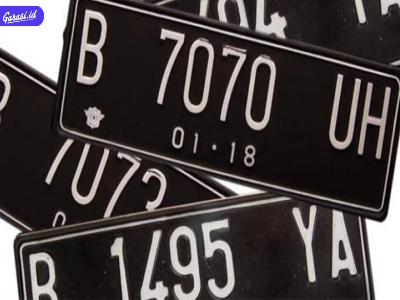

In [97]:
resized_image_cv2

In [113]:
#2 Edge detection menggunakan sobel dan canny

# Deteksi tepi menggunakan filter Sobel
sobel_x = cv2.Sobel(resized_image_cv2, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(resized_image_cv2, cv2.CV_64F, 0, 1, ksize=5)

# Deteksi tepi menggunakan metode Canny
canny_edges = cv2.Canny(resized_image_cv2, 100, 200)

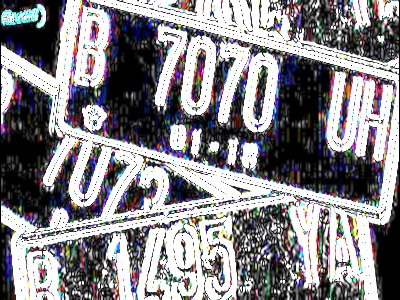

In [99]:
# Menampilkan hasil deteksi tepi menggunakan Sobel
cv2_imshow(cv2.convertScaleAbs(sobel_x))

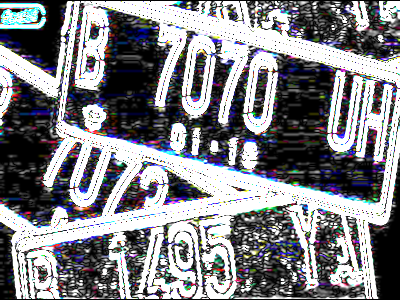

In [100]:
cv2_imshow(cv2.convertScaleAbs(sobel_y))

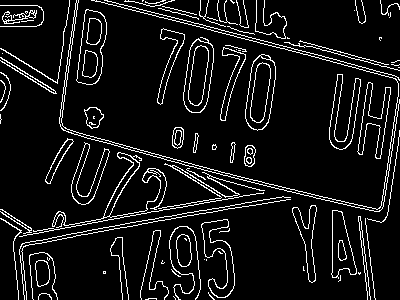

In [72]:
# Menampilkan hasil deteksi tepi menggunakan Canny
cv2_imshow(canny_edges)

In [101]:
#3 Membuat cropping: random cropping dan half-size center cropping

# Fungsi untuk melakukan random cropping
def random_crop(image, crop_height, crop_width):
    height, width = image.shape[:2]
    y = random.randint(0, height - crop_height)
    x = random.randint(0, width - crop_width)
    cropped_image = image[y:y+crop_height, x:x+crop_width]
    return cropped_image

# Fungsi untuk melakukan half-size center cropping
def center_crop_half_size(image):
    height, width = image.shape[:2]
    crop_height = height // 2
    crop_width = width // 2
    center_y = height // 2
    center_x = width // 2
    cropped_image = image[center_y - crop_height // 2:center_y + crop_height // 2, center_x - crop_width // 2:center_x + crop_width // 2]
    return cropped_image

# Menjalankan random cropping
cropped_random = random_crop(image_cv2, 200, 200)

# Menjalankan half-size center cropping
cropped_half_size = center_crop_half_size(resized_image_cv2)

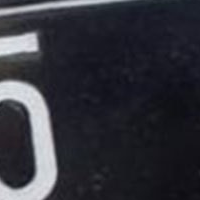

In [102]:
# Menampilkan hasil random cropping
cv2_imshow(cropped_random)

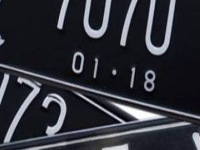

In [103]:
# Menampilkan hasil half-size center cropping
cv2_imshow(cropped_half_size)

In [143]:
#4 Transformasi pada gambar: putih jadi hitam, hitam jadi putih

# Mengubah warna
def invert_colors(image):
    inverted_image = cv2.bitwise_not(image)
    return inverted_image

# Menjalankan transformasi warna putih menjadi hitam
inverted_image_black_to_white = invert_colors(resized_image_cv2)

# Menjalankan transformasi warna hitam menjadi putih
inverted_image_white_to_black = invert_colors(inverted_image_white_to_black)

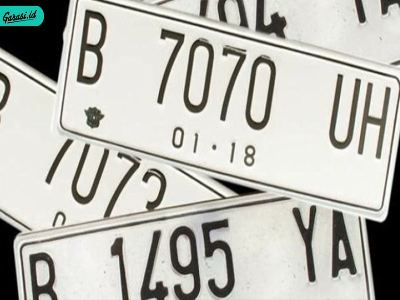

In [145]:
# Menampilkan hasil transformasi
cv2_imshow(inverted_image_black_to_white)

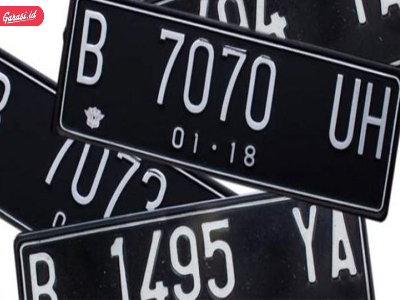

In [146]:
cv2_imshow(inverted_image_white_to_black)

In [106]:
#5 menambahkan noise

# Fungsi untuk menambahkan salt and pepper noise
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    salt_and_pepper_image = np.copy(image)
    salt_pixels = np.random.rand(*image.shape[:2]) < salt_prob
    pepper_pixels = np.random.rand(*image.shape[:2]) < pepper_prob
    salt_and_pepper_image[salt_pixels] = [255, 255, 255]  # Putih (salt)
    salt_and_pepper_image[pepper_pixels] = [0, 0, 0]      # Hitam (pepper)
    return salt_and_pepper_image

# Fungsi untuk menambahkan gaussian noise
def add_gaussian_noise(image, mean=0, std=25):
    gaussian_noise = np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(image.astype(np.float32) + gaussian_noise, 0, 255).astype(np.uint8)
    return noisy_image

# Menjalankan penambahan noise pada gambar
image_salt_pepper_noise = add_salt_and_pepper_noise(resized_image_cv2, salt_prob=0.05, pepper_prob=0.05)
image_gaussian_noise = add_gaussian_noise(resized_image_cv2)

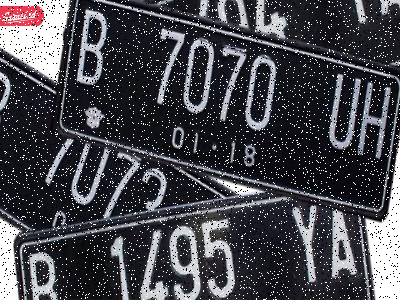

In [107]:
# Menampilkan hasil penambahan noise salt pepper
cv2_imshow(image_salt_pepper_noise)

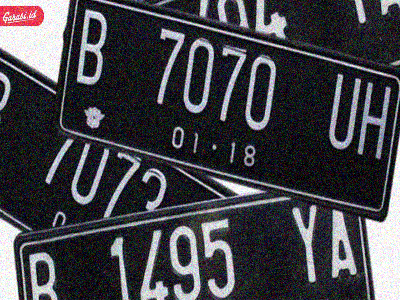

In [108]:
# Menampilkan hasil penambahan noise gaussian noise
cv2_imshow(image_gaussian_noise)

In [147]:
#6 Transformasi geometri: rotasi, flip vertikal dan horizontal

# Fungsi untuk melakukan rotasi gambar
def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

# Fungsi untuk melakukan flip vertikal
def flip_vertical(image):
    flipped_image = cv2.flip(image, 0)
    return flipped_image

# Fungsi untuk melakukan flip horizontal
def flip_horizontal(image):
    flipped_image = cv2.flip(image, 1)
    return flipped_image

# Menjalankan rotasi gambar
rotated_image = rotate_image(resized_image_cv2, 45)

# Menjalankan flip vertikal
flipped_vertical_image = flip_vertical(resized_image_cv2)

# Menjalankan flip horizontal
flipped_horizontal_image = flip_horizontal(resized_image_cv2)


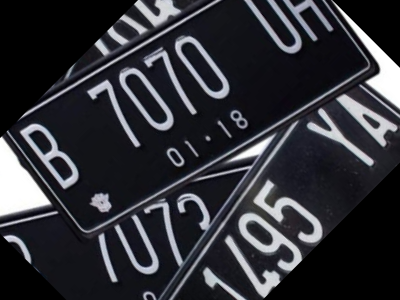

In [110]:
# Menampilkan hasil transformasi geometri rotasi
cv2_imshow(rotated_image)

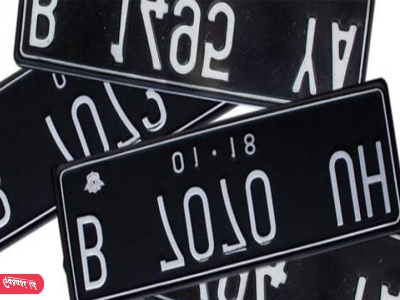

In [111]:
# Menampilkan hasil transformasi geometri flip vertical
cv2_imshow(flipped_vertical_image)

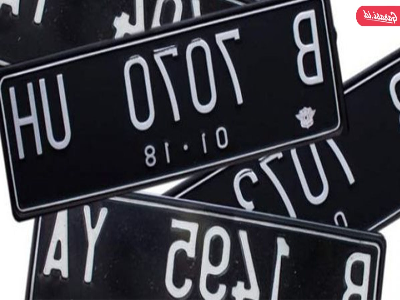

In [112]:
# Menampilkan hasil transformasi geometri flip horizontal
cv2_imshow(flipped_horizontal_image)